### **Support Vector Machine**

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

In [228]:
df = pd.read_csv(url)

In [229]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* survival:	Survival	0 = No, 1 = Yes
* pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex:	Sex	
* Age:	Age in years	
* sibsp:	# of siblings / spouses aboard the Titanic	
* parch:	# of parents / children aboard the Titanic	
* ticket:	Ticket number	
* fare:	Passenger fare	
* cabin:	Cabin number	
* embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### EDA

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [231]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [232]:
df.drop("Cabin", axis=1, inplace= True)

In [233]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

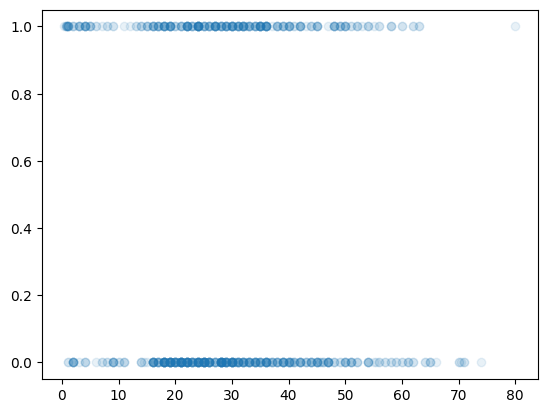

In [234]:
plt.scatter(x = "Age", y="Survived", data=df, alpha=0.1)

In [235]:
df[(df["Age"] > 70) & (df["Survived"] == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,S


### Hayatta Kalma Oranları

In [236]:
df[(df["Age"] < 20) & (df["Survived"] == 1)].value_counts()

PassengerId  Survived  Pclass  Name                                 Sex     Age   SibSp  Parch  Ticket      Fare      Embarked
10           1         2       Nasser, Mrs. Nicholas (Adele Achem)  female  14.0  1      0      237736      30.0708   C           1
550          1         2       Davies, Master. John Morgan Jr       male    8.0   1      1      C.A. 33112  36.7500   S           1
690          1         1       Madill, Miss. Georgette Alexandra    female  15.0  0      1      24160       211.3375  S           1
678          1         3       Turja, Miss. Anna Sofia              female  18.0  0      0      4138        9.8417    S           1
652          1         2       Doling, Miss. Elsie                  female  18.0  0      1      231919      23.0000   S           1
                                                                                                                                 ..
262          1         3       Asplund, Master. Edvin Rojj Felix    male    3.0  

In [237]:
len(df[(df["Age"] < 20) & (df["Survived"] == 1)])

79

In [238]:
len(df[(df["Age"] < 20) & (df["Survived"] == 0)])

85

In [239]:
# 15 Yaşın altındakilerin hayatta kalma oranı

survivedfif = len(df[(df["Age"] < 15) & (df["Survived"] == 1)])

diedfif = len(df[(df["Age"] < 15) & (df["Survived"] == 0)]) 

survivedAve = (survivedfif) / (survivedfif + diedfif)

In [240]:
yuzdeoran=round(survivedAve * 100,2)
print(f"15 Yaştan Küçüklerin Hayatta Kalma Oranı %{yuzdeoran}")

15 Yaştan Küçüklerin Hayatta Kalma Oranı %57.69


In [241]:
# Toplam hayatta kalma oranı

survivedpass = len(df[df["Survived"] == 1])
diedpass = len(df[df["Survived"] == 0])

allsurvivedAve = (survivedpass) / (survivedpass + diedpass) 

allyuzde=round(allsurvivedAve, 2) * 100
print(f"Hayatta Kalma Oranı %{allyuzde}")

Hayatta Kalma Oranı %38.0


In [242]:
# Yaşı NaN olan verilerimiz

age_na = df[df["Age"].isna()]
age_na.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q


In [243]:
age_na.value_counts("Survived")

Survived
0    125
1     52
Name: count, dtype: int64

In [244]:
print("Yaşı Belirsizlerin Hayatta Kalma Oranı: %", (52 / (52 + 125)) * 100)

Yaşı Belirsizlerin Hayatta Kalma Oranı: % 29.37853107344633


In [245]:
# Yaşları belirli olmayanlar için ya bir grubunkine eşitleriz örneğin aşşağıda 3 üncü classın yaş ortalaması var ama ne kadar mantıklı olabilir ? 

# Buradaki tercihimiz yaşları olmayanları çıkarmak olacak 

In [246]:
df[df["Pclass"] == 3].mean(numeric_only= True)

PassengerId    439.154786
Survived         0.242363
Pclass           3.000000
Age             25.140620
SibSp            0.615071
Parch            0.393075
Fare            13.675550
dtype: float64

In [ ]:
# Doldurmak isteseydim ortalamayla nasıl yapmalıydım Örneğin: 


# df["Age"] = round(df[df["Pclass"] == 3]["Age"].mean())

In [ ]:
# 2 Yukarıda da dediğim gibi şuanda düşürerek yapıyoruz

df = df.dropna()

In [ ]:
# Atınca 712 verimiz kaldı
print(len(df))

712


<Axes: xlabel='Age', ylabel='Pclass'>

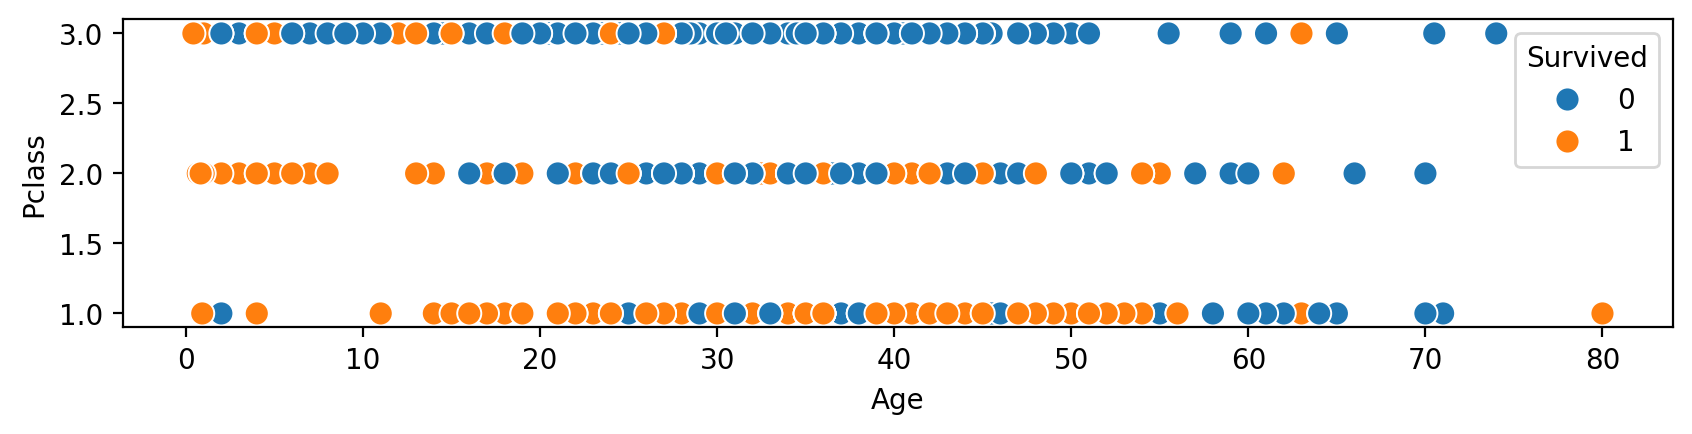

In [ ]:
plt.figure(figsize=(10, 2), dpi=200)

sns.scatterplot(x = "Age", y = "Pclass",data=df, hue="Survived", s= 75)

# Garibanın yüzü gülürmü ? 

In [257]:
df[["Pclass", "Survived"]].value_counts()

Pclass  Survived
3       0           270
1       1           120
2       0            90
3       1            85
2       1            83
1       0            64
Name: count, dtype: int64

In [ ]:
# Ödev : Garibanların Ve Kodomanların Hayatta Kalma Oranı

'How to print numbers on a sns countplot Mesela çocuk hiçbir zaman böyle elle yazdiği gibi yazmamiş'

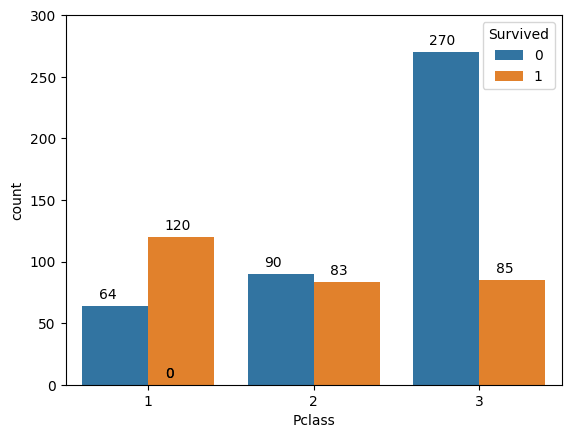

In [260]:
ax = sns.countplot(x="Pclass", data=df, hue="Survived")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+6))
plt.ylim(0,300);


"How to print numbers on a sns countplot Mesela çocuk hiçbir zaman böyle elle yazdiği gibi yazmamiş"

## Train Test Split

In [261]:
from sklearn.model_selection import train_test_split

In [263]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [264]:
# İşimiz olmayanları atacağız ardından dummy hale getireceğiz

X = df.drop(["PassengerId", "Name", "Ticket", "Survived"], axis=1)

In [266]:
X = pd.get_dummies(X, drop_first= True)
y = df["Survived"]

In [267]:
X.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True


In [ ]:
# Yukarıda doğal olarak Fare(Bilet ücreti) ile classlar arasındaki ilişki olduğunu bilgisayar ileride bize söyleyebillir

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [274]:
y_train

592    0
117    0
877    0
153    0
725    0
      ..
703    0
238    0
685    0
282    0
729    0
Name: Survived, Length: 498, dtype: int64

In [275]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
592,3,47.0,0,0,7.2500,True,False,True
117,2,29.0,1,0,21.0000,True,False,True
877,3,19.0,0,0,7.8958,True,False,True
153,3,40.5,0,2,14.5000,True,False,True
725,3,20.0,0,0,8.6625,True,False,True
...,...,...,...,...,...,...,...,...
703,3,25.0,0,0,7.7417,True,True,False
238,2,19.0,0,0,10.5000,True,False,True
685,2,25.0,1,2,41.5792,True,False,False
282,3,16.0,0,0,9.5000,True,False,True


### SVM Model

In [276]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [280]:
model = SVC()

In [281]:
C = 10.0 ** np.arange(-2, 4)

parameters = {
    "C" : C,
    "kernel" : ["rbf", "poly"],
    "degree" : [2, 3, 4] # Poly kullanırsa derece denesin diye ekledik buraya
    }

In [282]:
C

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [283]:
grid = GridSearchCV(model, parameters, cv = 9)
# cv
# 9 Parçaya bölerek 8 i train 1 test oluyor cv yapsın hani testi her defasında adım adım ayırıp hepsinde geziyordu işlem yapıyor sonra bu 9 adımdan alınanı analiz edip tekrar birleştirdikten sonra en iyi olai bize veriyor 
grid.fit(X_train, y_train)

GridSearchCV(cv=9, estimator=SVC(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'degree': [2, 3, 4], 'kernel': ['rbf', 'poly']})

In [ ]:
# Yukarıda gözüküyor en iyi model best_estimator kısmında ama yine de yazdım
grid.best_params_

{'C': 1000.0, 'degree': 2, 'kernel': 'poly'}

In [ ]:
# Yukarıda belki 4 ten büyük bir parametre değeri seçseydik belki 10000 bizim için daha iyi bir parametre olabilirdi ama bu işlem gücü gereksinimini exponansiyel olarak arttırdığı için C değeri ne kadar büyürse o kadar işlem gücü gerekiyor o şimdilik böylece kalsın

In [285]:
jack = grid.predict(X_test)

In [286]:
grid.best_score_

0.8031385281385282

In [287]:
from grid_plot import GridSearch_table_plot

best parameters: {'C': 1000.0, 'degree': 2, 'kernel': 'poly'}
best score:      0.80314 (+/-0.05411)
{'C': 1000.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,mean_test_score,std_test_score,rank_test_score
31,0.207197,0.101191,0.002780,0.002103,1000.0,2,poly,"{'C': 1000.0, 'degree': 2, 'kernel': 'poly'}",0.714286,0.892857,0.839286,0.800000,0.854545,0.781818,0.727273,0.818182,0.800000,0.803139,0.054109,1
32,0.041300,0.011141,0.003172,0.000944,1000.0,3,rbf,"{'C': 1000.0, 'degree': 3, 'kernel': 'rbf'}",0.732143,0.875000,0.785714,0.781818,0.800000,0.763636,0.709091,0.800000,0.800000,0.783045,0.044427,2
30,0.041492,0.008964,0.003473,0.000822,1000.0,2,rbf,"{'C': 1000.0, 'degree': 2, 'kernel': 'rbf'}",0.732143,0.875000,0.785714,0.781818,0.800000,0.763636,0.709091,0.800000,0.800000,0.783045,0.044427,2
34,0.043270,0.011602,0.002809,0.000795,1000.0,4,rbf,"{'C': 1000.0, 'degree': 4, 'kernel': 'rbf'}",0.732143,0.875000,0.785714,0.781818,0.800000,0.763636,0.709091,0.800000,0.800000,0.783045,0.044427,2
24,0.012130,0.000673,0.003913,0.000835,100.0,2,rbf,"{'C': 100.0, 'degree': 2, 'kernel': 'rbf'}",0.750000,0.821429,0.785714,0.781818,0.836364,0.727273,0.672727,0.781818,0.818182,0.775036,0.048712,5
28,0.009424,0.000942,0.002959,0.000818,100.0,4,rbf,"{'C': 100.0, 'degree': 4, 'kernel': 'rbf'}",0.750000,0.821429,0.785714,0.781818,0.836364,0.727273,0.672727,0.781818,0.818182,0.775036,0.048712,5
26,0.008922,0.000807,0.002702,0.000692,100.0,3,rbf,"{'C': 100.0, 'degree': 3, 'kernel': 'rbf'}",0.750000,0.821429,0.785714,0.781818,0.836364,0.727273,0.672727,0.781818,0.818182,0.775036,0.048712,5
33,1.897266,0.798317,0.002400,0.001160,1000.0,3,poly,"{'C': 1000.0, 'degree': 3, 'kernel': 'poly'}",0.642857,0.732143,0.785714,0.709091,0.709091,0.763636,0.636364,0.727273,0.745455,0.716847,0.047335,8
25,0.034154,0.014020,0.003151,0.001259,100.0,2,poly,"{'C': 100.0, 'degree': 2, 'kernel': 'poly'}",0.625000,0.660714,0.696429,0.690909,0.709091,0.745455,0.636364,0.709091,0.781818,0.694986,0.047155,9
35,7.551946,5.054591,0.002066,0.000611,1000.0,4,poly,"{'C': 1000.0, 'degree': 4, 'kernel': 'poly'}",0.625000,0.678571,0.660714,0.709091,0.672727,0.763636,0.654545,0.618182,0.709091,0.676840,0.042842,10


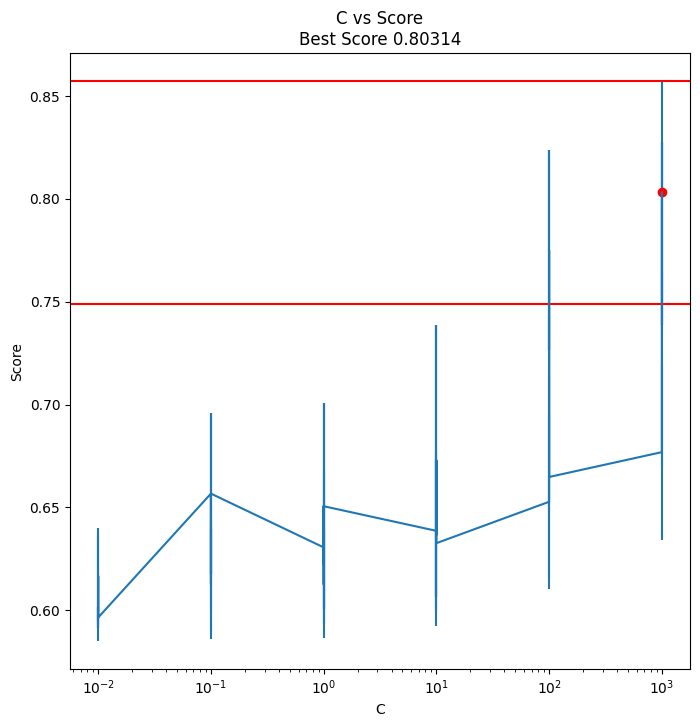

In [ ]:
GridSearch_table_plot(grid, "C", negative= False)
# Bu aşşağıdaki tabloda biz GridSearchCV yaparken ki durumda hani 9 sonuç yapıyorduk ya onların değerleri ayrıca onların ortalamaları Rank değerleri falan var EN AŞŞAĞIDA Tablomuz var

## Model Değerlendirme

In [289]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

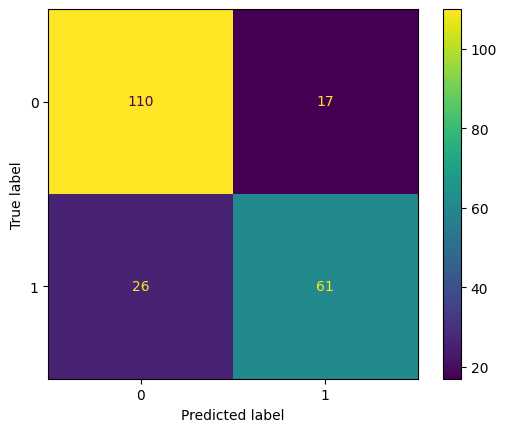

In [290]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

In [291]:
print(classification_report(y_test, jack))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       127
           1       0.78      0.70      0.74        87

    accuracy                           0.80       214
   macro avg       0.80      0.78      0.79       214
weighted avg       0.80      0.80      0.80       214

